#### <strong>第二次作品：PCA、SVD及其在影像處理的運用</strong>
學號：410978002

姓名：謝元皓

 <font color=skyblue>作品目標</font>：藉由了解數位影像的儲存概念，以實際的資料展現主成分分析及svd分解在資料壓縮上的功能。
 <hr>

#### <font color=PURPLE>CH6 習題一</font>：

將一張圖像 X 利用 SVD 的 “Rank q approximation”，能達到壓縮的目的並保持圖像的品質。比較下列幾種對於圖像矩陣 X 的重組安排，並進行 “Rank q approximation”，在同樣的壓縮比之下，觀察還原後的圖像品質哪個最好？能說出理由嗎？
[圖像X選用摩托車圖(scooter.jpg)]
<img src="scooter.jpg" alt="Getting started" width="500"/> 

(1)先將摩托車圖印出來，將原始彩色圖檔轉為黑白圖

p.s.圖片原本為 $512*512*3$ 代表彩色圖，若轉為 $512*512*2$ 意味著轉為黑白圖。

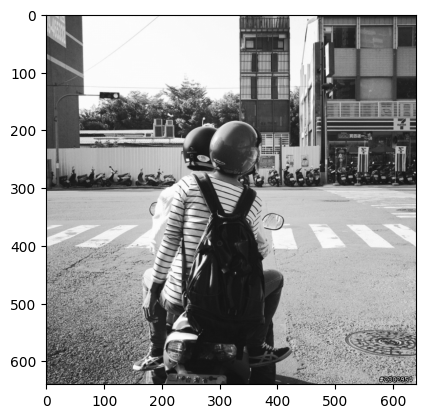

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

imgfile = 'scooter.jpg' #512*512*3
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2) # convert RGB to grayscale
# x = io.imread(imgfile, as_gray = True)
plt.imshow(X, cmap = 'gray')

plt.show()

(2) 比較圖片未壓縮，壓縮四倍，壓縮十六倍，壓縮六十四倍的成像結果。
此成像結果為分別取 $640$ 個主成分，$160$ 個主成分，$40$ 個主成分，$10$ 個主成分，可以觀察到畫質明顯存在落差。

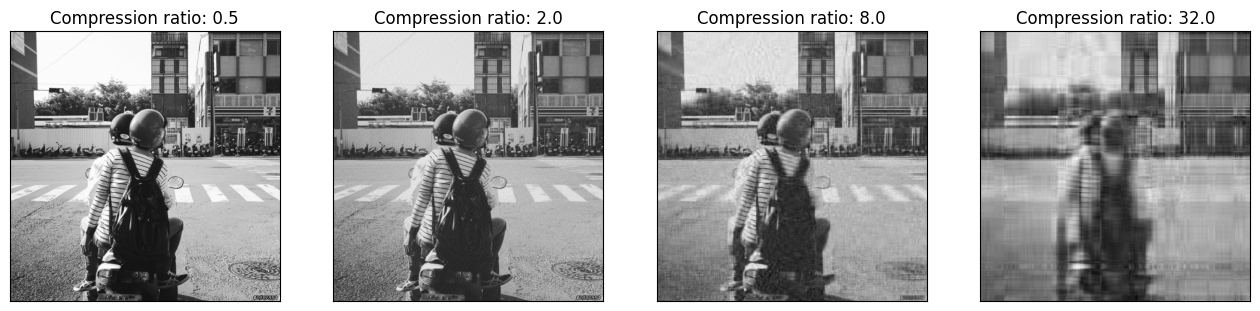

[640 160  40  10]


In [21]:
import matplotlib.pyplot as plt
from numpy.linalg import svd
import matplotlib.image as mpimg
import numpy as np
                          
imgfile = 'scooter.jpg' #512*512*3
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2) # convert RGB to grayscale

p, N = X.shape # p by N, p = 512, N = 512
U, E, VT = svd(X, full_matrices = False)
q = np.array([p, p/4, p/16, p/64]).astype('int')
fig, ax = plt.subplots(1, 4, figsize = (16, 4))    
for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] 
    ax[i].imshow(Xq, cmap = 'gray')
    ratio = p * N / (U.shape[0] + VT.shape[1] + 1) / r
    ax[i].set_title('Compression ratio: {:.1f}'.format(ratio))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()
print(q)

(3)定義 montage  函數代表意義

In [18]:
import numpy as np
def montage(A, m, n):
    sz = np.sqrt(A.shape[0]).astype('int') #image size sz*sz
    M = np.zeros((m*sz,n*sz)) # montage image
    for i in range(m):
        for j in range(n):
            M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
            A[:, i*n+j].reshape(sz, sz)
    return M

(4) 將 X 以 $8 \times 8$ 小圖（patch）進行切割，再將每個小圖拉成 $64 \times 1$ 的向量，最後重組這些向量並排成新的 $64\times N$ 矩陣，並進行 “Rank q approximation”，觀察與原圖直接壓縮的差異:

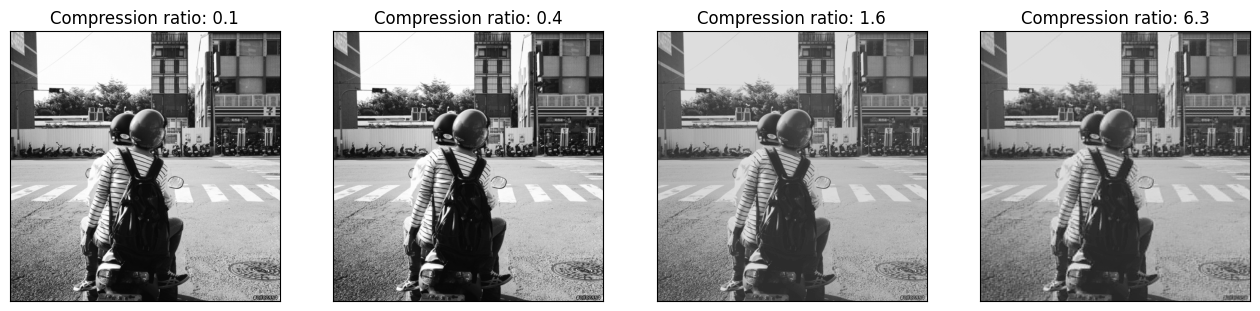

In [22]:
import numpy as np
from numpy.linalg import svd
import skimage.util as skutil
from skimage import io
import matplotlib.pyplot as plt


imgfile = "scooter.jpg" 
X = io.imread(imgfile, as_gray = True)

# 將圖像切割小區域
p, N = X.shape 
patch_sz = 8
p_patch = patch_sz ** 2 
N_patch = int(N * p / p_patch)
patches = skutil.view_as_windows(X, (patch_sz, patch_sz), \
                                 step=patch_sz)

M = np.empty((patch_sz*patch_sz, 0))  

# initialize M as an empty array with shape (patch_sz*patch_sz,0)

for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        patch = patches[i, j].reshape(-1, 1)
        M = np.append(M, patch, axis=1)  # append the reshaped patch to M

U, E, VT = svd(M, full_matrices = False)
#q = np.array([256, 102, 51, 25]).astype('int')
#圖片重生
q = np.array([p, p/4, p/16, p/64]).astype('int')
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i, r in enumerate(q):
    Mq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] 
    ax[i].imshow(montage(Mq, int(p/patch_sz), int(p/patch_sz)), cmap = 'gray')
    ratio = N * p / (U.shape[0] + VT.shape[1]) / r
    ax[i].set_title('Compression ratio: {:.1f}'.format(ratio))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()


(5) 將 X 以 $16\times 16$ 小圖（patch）進行切割，再將每個小圖拉成 $256\times 1$ 的向量，最後重組這些向量並排成新的 $256\times N$ 矩陣，並進行 “Rank q approximation”，觀察與原圖直接壓縮的差異:

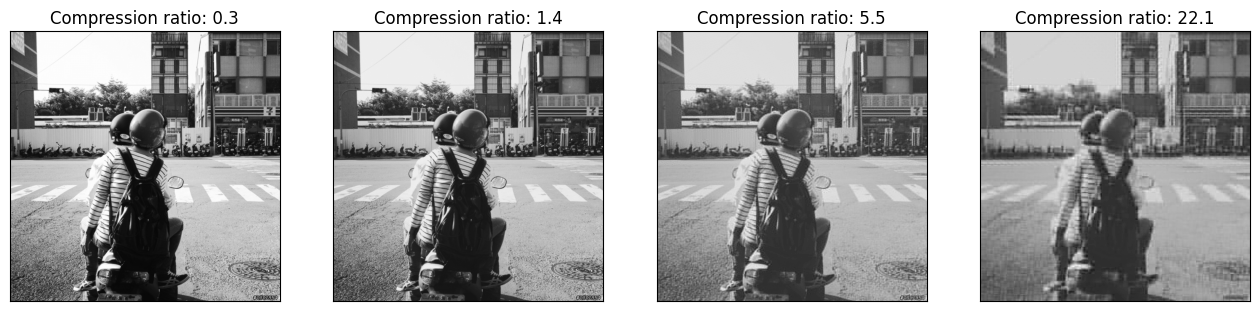

In [27]:
import numpy as np
from numpy.linalg import svd
import skimage.util as skutil
from skimage import io
import matplotlib.pyplot as plt


imgfile = "scooter.jpg" 
X = io.imread(imgfile, as_gray = True)

# 將圖像切割小區域
p, N = X.shape 
patch_sz = 16
p_patch = patch_sz ** 2 
N_patch = int(N * p / p_patch)
patches = skutil.view_as_windows(X, (patch_sz, patch_sz), \
                                 step=patch_sz)

M = np.empty((patch_sz*patch_sz, 0))  

# initialize M as an empty array with shape (patch_sz*patch_sz,0)

for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        patch = patches[i, j].reshape(-1, 1)
        M = np.append(M, patch, axis=1)  # append the reshaped patch to M

U, E, VT = svd(M, full_matrices = False)
q = np.array([p, p/4, p/16, p/64]).astype('int')
# q = np.array([p/4, p/8, p/16]).astype('int')
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i, r in enumerate(q):
    Mq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] 
    ax[i].imshow(montage(Mq, int(p/patch_sz), int(p/patch_sz)), cmap = 'gray')
    ratio = N * p / (U.shape[0] + VT.shape[1]) / r
    ax[i].set_title('Compression ratio: {:.1f}'.format(ratio))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()


(6) 將 X 以 $32\times 32$ 小圖（patch）進行切割，再將每個小圖拉成 $1024\times 1$ 的向量，最後重組這些向量並排成新的 $1024\times N$ 矩陣，並進行 “Rank q approximation”，觀察與原圖直接壓縮的差異:

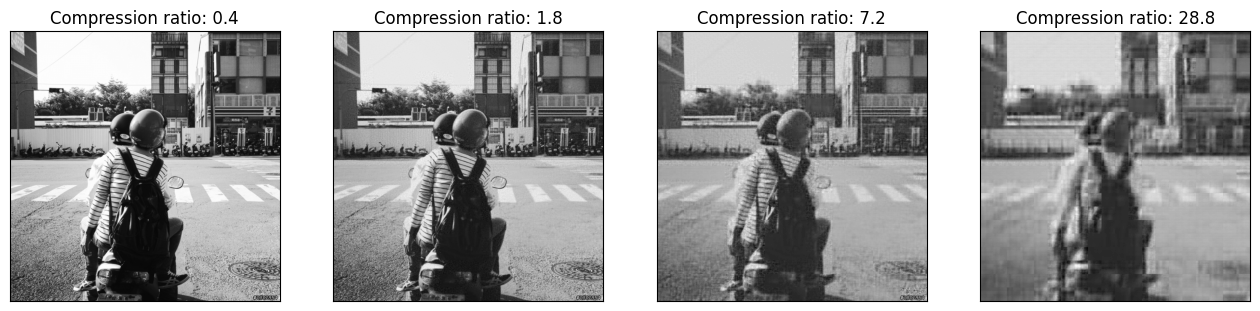

In [28]:
import numpy as np
from numpy.linalg import svd
import skimage.util as skutil
from skimage import io
import matplotlib.pyplot as plt


imgfile = "scooter.jpg" 
X = io.imread(imgfile, as_gray = True)

# 將圖像切割小區域
p, N = X.shape 
patch_sz = 32
p_patch = patch_sz ** 2 
N_patch = int(N * p / p_patch)
patches = skutil.view_as_windows(X, (patch_sz, patch_sz), \
                                step=patch_sz)

M = np.empty((patch_sz*patch_sz, 0))  

# initialize M as an empty array with shape (patch_sz*patch_sz,0)

for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        patch = patches[i, j].reshape(-1, 1)
        M = np.append(M, patch, axis=1)  # append the reshaped patch to M

U, E, VT = svd(M, full_matrices = False)
q = np.array([p, p/4, p/16, p/64]).astype('int')
# q = np.array([p/4, p/8, p/16]).astype('int')
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i, r in enumerate(q):
    Mq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] 
    ax[i].imshow(montage(Mq, int(p/patch_sz), int(p/patch_sz)), cmap = 'gray')
    ratio = N * p / (U.shape[0] + VT.shape[1]) / r
    ax[i].set_title('Compression ratio: {:.1f}'.format(ratio))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()


**<font color=steelblue>結果的觀察與討論：</font>**
- 挑的圖片必須要是正方形的，不然在切割重組的過程中會毀損圖片(我用其他非正方形的圖片嘗試三天得出的心得^_^)
- 觀察這幾種種況可以發現，相比切割後重組的影像，原圖直接壓縮得到的圖像品質最差。
- 而切割後壓縮重組的影像可以看出，畫質最好的是 $8\times 8$，其次是 $16\times 16$，最差的是$32\times 32$
<hr>


#### <font color=purple>CH6 習題二</font>：

處理大量影像前，有必要觀看影像圖，以確定能掌握將要處理的影像及其資料型態。以 70000 張手寫圖像為例，每個數字約 7000 字，需要寫一段程式碼來觀察這些手寫數字的影像與品質，且每次執行都能隨機觀看到不同的影像，如下圖左（共兩排含 0~9 的數字各 50 個）與圖右的影像是兩次執行的結果。


<img src="fun_fb.png"  width="300"/>  
<img src="fun_fc.png"  width="300"/> 


(1) 下載講義內使用的手寫數字圖像檔案，取得圖像矩陣 X 與標籤 y 

- X 為一個(784,70000)的矩陣。
- 每張大小為 $28\times 28 $ 的灰階影像共70000張
- 每個數字大約各7000張

In [3]:
from scipy.io import loadmat
 
mnist = loadmat("mnist-original.mat")
X = mnist["data"]
y = mnist["label"][0]

- 以下的程式為秀出矩陣X中的一張數字圖，透過改變i的值，呈現不同的數字。
- i 約每增加7000會改變呈現的數字。

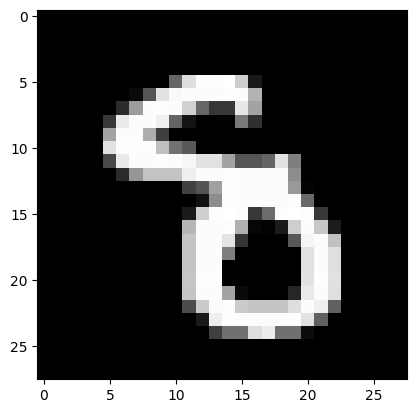

In [3]:
import matplotlib.pyplot as plt
import numpy as np
i = 50000
img = X[:, i]
sz = np.sqrt(len(img)).astype('int')
plt.imshow(np.array(img).reshape(sz, sz), cmap='gray')
plt.show()

- 定義montage
- 以下程式秀出一組數字，約7000個樣本中，隨機選取$5\times 10 = 100$ 個
- 改變number_show時，隨機抽取的數字會跟著變動。

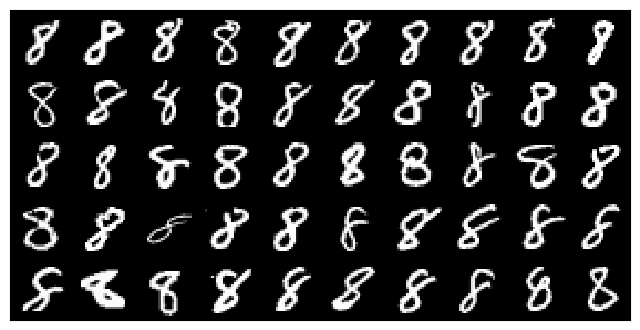

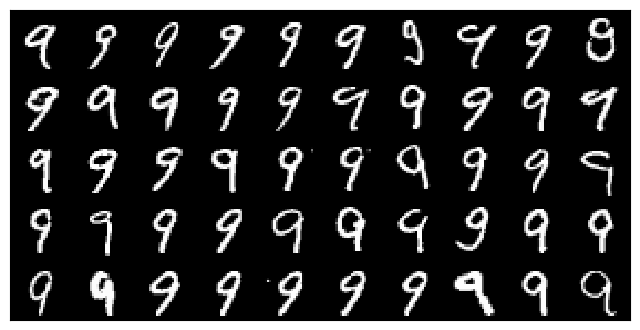

In [16]:
## 定義蒙太極
def montage(A, m, n):
    sz = np.sqrt(A.shape[0]).astype('int') #image size sz*sz
    M = np.zeros((m*sz,n*sz)) # montage image
    for i in range(m):
        for j in range(n):
            M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
            A[:, i*n+j].reshape(sz, sz)
    return M
##產生數字8----------------------------
number_show = 8
Digit = X[:, y==number_show]
plt.figure(figsize = (8, 6))
m, n = 5, 10 # A m x n montage (total mn images)
M = montage(Digit, m, n)
plt.imshow(M, cmap = 'gray', interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.show()
##產生數字9---------------------------------------
number_show = 9
Digit = X[:, y==number_show]
plt.figure(figsize = (8, 6))
m, n = 5, 10 # A m x n montage (total mn images)
M = montage(Digit, m, n)
plt.imshow(M, cmap = 'gray', interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.show()

(2)設定框架及畫圖
- 透過montage及運用迴圈的方式，將圖形重現出來。
- 採用取後不放回的方式，從數字k中的所有樣本中隨機選取50個。
- number 代表0-9的所有數字。
- 同個數字畫在一張圖，排成 [5,10]的樣子。
- 不同數字由左到右，由上到下依序呈現 $0$~$9$。

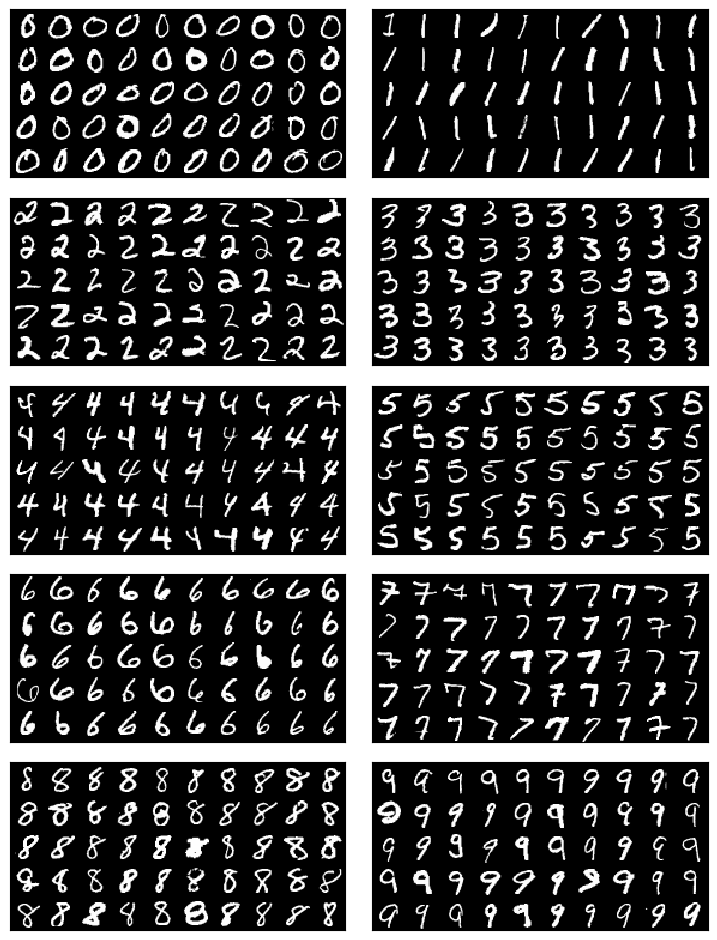

In [12]:
## 設定圖形框架
fig, ax = plt.subplots(5, 2, figsize = (9, 12))
number = 0
m, n = 5, 10  # m x n montage (total mn images)
## 用雙迴圈畫圖
for i in range(5) :
    for j in range(2) :
        number_show = number
        Digit = X[:, y==number_show]
        a = np.random.choice(np.arange(Digit.shape[1]), replace=False, size=m*n)
        Digit1 = Digit[:, a]
        M = montage(Digit1, m, n)
        ax[i, j].imshow(M, cmap = "gray", interpolation = 'nearest')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        number = number+1
fig.patch.set_facecolor('white')
fig.subplots_adjust(wspace=0.08, hspace=0.1)


**<font color=steelblue>結果的觀察與討論：</font>**
- 原本嘗試不用迴圈作圖，但所需輸入的矩陣太過複雜，最後決定還是用雙迴圈完成。
- 之後做更大筆資料，或影像辨識時，需用此方法先將影像初步呈現出來觀察，才可進行後續的動作。
- 對比每次程式執行呈現的數字樣貌確實不一樣。
<hr>


#### <font color=PURPLE>CH6 習題三</font>：
每張大小 28×28 的手寫數字圖像 70000 張，不經壓縮前的儲存空間為 54.88 M Bytes。若進行 SVD 的 “Rank q approximation”，則壓縮倍數由 q 決定。寫一支程式，當調整 q 值時，可以算出壓縮的倍數，並同時顯示原圖與壓縮後還原的圖各 100 張做為比較（任選 100 張）。另外 q 的選擇可以根據 $\sigma_1$ , $\sigma_2$, $\cdots$, $\sigma_r$ 的「能量配置」來決定，或說決定 q 之後，可以計算所採用的主成分的能量佔比，本題也可以順便列印出這個佔比。

##### STEP1:匯入所需函數與定義montage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def montage(A, m, n):
    sz = np.sqrt(A.shape[0]).astype('int') #image size sz*sz
    M = np.zeros((m*sz,n*sz)) # montage image
    for i in range(m):
        for j in range(n):
            M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
            A[:, i*n+j].reshape(sz, sz)
    return M


##### STEP2: 定義影像參數及生成隨機參數(q選20)

In [4]:
q = 20
m, n = 10, 10
random = np.random.choice(np.arange(X.shape[1]), replace=False, size=m*n)


##### STEP3:進行奇異值分解SVD

In [5]:
U, E, VT = np.linalg.svd(X, full_matrices=False)

##### STEP4: 計算壓縮影像Xq

In [6]:
Xq = U[:, :q] @ np.diag(E[:q]) @ VT[:q, :]


##### STEP5: 選擇壓縮後的影像並繪製

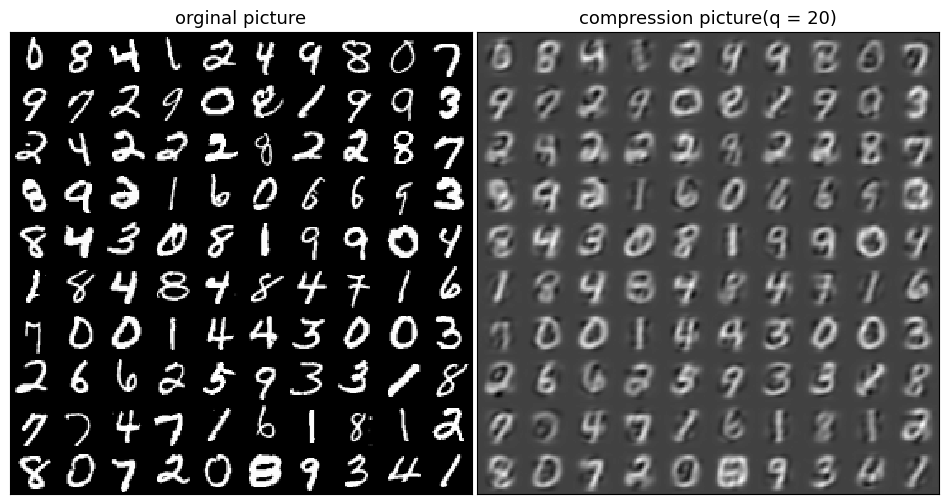

In [15]:
Xnew = X[:, random]
xqnew = Xq[:, random]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(montage(Xnew, m, n), cmap="gray", interpolation='nearest')
ax[0].set_title("orginal picture", fontsize=13)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(montage(xqnew, m, n), cmap="gray", interpolation='nearest')
ax[1].set_title("compression picture(q = {})".format(q), fontsize=13)
ax[1].set_xticks([])
ax[1].set_yticks([])
fig.patch.set_facecolor('white')
fig.subplots_adjust(wspace=0.01)
plt.show()


**<font color=steelblue>結果的觀察與討論：</font>**
- 改變q值即可觀察不同壓縮的效果
- 嘗試後發現當q值越大時，呈現的影像會越清晰，代表選取越多主成分。
- 壓縮占比的部分來不及完成，會於訂正作業時補齊。
<hr>

#### <font color=SKYBLUE> CH7 習題1 </font>：
有 5 張經過加密的影像圖，其加密的方式採 Yale Faces 38 人 2410 張人臉圖像矩陣 X 的 SVD，即 $X = U\Sigma V^T$，取 U 作為影像加密的工具，即假設向量 x 代表一張原圖影像，則 $U[:, 0:q]^T x$ 代表該影像的前 q 個主成分，以此作為加密影像。請注意：這 5 張影像圖的主成分採 $q=2000$，矩陣 X 先減去平均值，再執行 SVD 得到 U。

1.請解密這 5 張影像。

##### STEP1: 定義較複雜的montage & 讀檔
- X: image matrix in which each column respersents an image 
- n, m: image size n*m
- h, w: create an montage front size = (w,h)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io 
import os
##---------------------定義montage
def show_montage(X, n, m, h, w):
    fig, axes = plt.subplots(h, w, figsize = (w,h)) 
    if X.shape[1] < w * h: #影像張數不到 w * h 張，用 0 向量補齊 
        X = np.c_[X, np.zeros((X.shape[0], w*h-X.shape[1]))]
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[:,i].reshape(m, n).T, cmap = 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
##------------------------讀檔
D = scipy.io.loadmat("allFaces.mat")
X = D['faces'] # 32256*2410 each column represents an image
y = np.ndarray.flatten(D['nfaces'])
m = D['m'].item() # 168
n = D['n'].item() # 192
# n_persons = len(y)
n_persons = D['person'].item() # 38



##### STEP2: SVD分解
- 運用到PYTHON裡面broadcasting 的技術
- X_avg為所有eigenface的平均數，拿avg_face做SVD是為了所有臉不要差太遠。
- full_matrices = False 因為只有r=2410對角線有東西，故不需要產生完整$32256\times 32256$的矩陣

In [3]:
from numpy.linalg import svd
avgFace = X.mean(axis=1)
X_avg = X - avgFace.reshape(-1,1)
U, E, VT = svd(X_avg, full_matrices = False)

##### STEP3: 解密
- $U[:, 0:q]^T x$ 為一個加密檔案，而在本題中$q = 2000$，故我們需要用$U[:, :q]$乘上題目給的加密檔案，完成解密的任務。
- Uq 如同加密與解密雙方共同持有的鑰匙。
<hr>

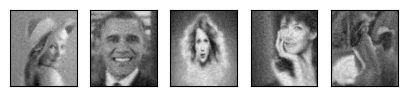

In [4]:
locked_data = pd.read_csv('五張加密的影像_2024.csv')
q = 2000
unlocked_data = U[:, :q] @ np.array(locked_data)
show_montage(unlocked_data, n, m, 1, 5)

2.自行找 5 張照片（大小必須同 Yale Faces 的 192×168 或自行 Resize），含人臉、水果、風景 … 等進行加密後（q 自選），再解密，觀察這些解密後的影像的效果，是否人臉的表現比較好？其他非人臉影像，如風景影像，能透過由人臉建構的特徵 U 加密嗎？（即解密後能否看到原圖模樣？）
# 未完成